<a href="https://colab.research.google.com/github/almedida/STA-512/blob/master/election_prediction_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Load Libraries**

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

import matplotlib as plt
from matplotlib import pyplot

# **Data Preparation**

VARIABLE NAMES and DESCRIPTIONS

RESPONSE VARIABLE is CLINTON (Percent vote for Clinton in 1992 presidential election).

County level results for percent voting for Bill Clinton in 1992 Presidential Election and Demographic variables.
Variables (listed in the order they appear in the dataset)
* COUNTY: County Name
* CLINTON: Percent voting for Clinton in 1992
* AGE: Median Age
* SAVINGS: Mean Savings($)
* INCOME: PerCapita Income ($)
* POVERTY: Percent in Poverty
* VETERANS: Percent Veterans
* FEMALE: Percent Female
* POP_DENSITY: Population Density
* NURSING: Percent in Nursing Homes - this is a measure of the age of the population
* CRIME: Crime Index (Per capita)
* DEM: Previous Election Political Preference (0=Republican, 1=Democratic, 2=mixed)

In [32]:
#read sas file
df = pd.read_sas('exam2.sas7bdat', format = 'sas7bdat', encoding='latin-1')

#save a copy as csv file
df.to_csv('election_data.csv', index=False)

In [38]:
#read new data
data_df = pd.read_csv('election_data.csv', sep =',')

In [39]:
data_df.head()

,county,CLINTON,Age,Savings,Income,Poverty,Veterans,Female,Pop_Density,Nursing,Crime,dem
0,"Owsley, KY",28.95,34.3,45723.0,9373.0,46.4,9.65,49.30,26.2,19.23,88.0,2.0
1,"Portage, OH",42.37,30.0,43414.0,16339.0,10.6,11.07,51.08,296.7,3.44,275.0,2.0
2,"Ouachita, AR",59.69,35.2,71745.0,14052.0,22.1,11.88,52.83,40.4,11.86,442.0,1.0
3,"St. Francois, MO",49.44,34.4,72654.0,13147.0,19.6,11.40,49.88,111.5,13.01,184.0,0.0
4,"Carroll, GA",37.21,30.4,62832.0,14798.0,16.0,7.53,51.52,148.0,7.17,461.0,2.0


In [40]:
#get the diminesion of the data
data_df.shape

(949, 12)

In [71]:
#checking the data types of the variables
data_df.dtypes

county          object
CLINTON        float64
Age            float64
Savings        float64
Income         float64
Poverty        float64
Veterans       float64
Female         float64
Pop_Density    float64
Nursing        float64
Crime          float64
dem            float64
dtype: object

In [80]:
data_df['dem'] = data_df['dem'].astype('int')

In [81]:
data_df.dtypes

county          object
CLINTON        float64
Age            float64
Savings        float64
Income         float64
Poverty        float64
Veterans       float64
Female         float64
Pop_Density    float64
Nursing        float64
Crime          float64
dem              int64
dtype: object

In [82]:
data_df.head()

,county,CLINTON,Age,Savings,Income,Poverty,Veterans,Female,Pop_Density,Nursing,Crime,dem
0,...,28.95,34.3,45723.0,9373.0,46.4,9.65,49.30,26.2,19.23,88.0,2
1,...,42.37,30.0,43414.0,16339.0,10.6,11.07,51.08,296.7,3.44,275.0,2
2,...,59.69,35.2,71745.0,14052.0,22.1,11.88,52.83,40.4,11.86,442.0,1
3,...,49.44,34.4,72654.0,13147.0,19.6,11.40,49.88,111.5,13.01,184.0,0
4,...,37.21,30.4,62832.0,14798.0,16.0,7.53,51.52,148.0,7.17,461.0,2


In [74]:
#summary of the data to get an insight on the dataflow
data_df.describe()

,CLINTON,Age,Savings,Income,Poverty,Veterans,Female,Pop_Density,Nursing,Crime,dem
count,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000
mean,40.165479,34.581981,91417.983140,16385.510011,16.362487,11.313815,51.088757,233.692413,9.608925,311.654373,1.512118
std,10.337133,3.632850,43028.502645,3295.011109,6.957856,2.193634,1.383086,1326.295243,6.826414,236.974385,0.808128
min,12.940000,23.400000,14062.000000,6118.000000,3.500000,2.780000,41.580000,0.400000,0.080000,0.000000,0.000000
25%,33.130000,32.600000,63422.000000,14247.000000,11.700000,9.850000,50.500000,19.600000,5.100000,149.000000,1.000000
50%,39.400000,34.300000,83262.000000,15905.000000,15.000000,11.430000,51.190000,44.400000,7.700000,261.000000,2.000000
75%,46.460000,36.500000,109640.000000,17899.000000,19.700000,12.910000,51.870000,112.100000,11.950000,423.000000,2.000000
max,84.640000,55.400000,387847.000000,35536.000000,52.000000,18.260000,54.550000,32360.300000,59.220000,2792.000000,2.000000


In [73]:
#inspecting if there are missing values
missing_data = data_df.isnull()
missing_data.head(5)

,county,CLINTON,Age,Savings,Income,Poverty,Veterans,Female,Pop_Density,Nursing,Crime,dem
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False


In [75]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

county
False    949
Name: county, dtype: int64

CLINTON
False    949
Name: CLINTON, dtype: int64

Age
False    949
Name: Age, dtype: int64

Savings
False    949
Name: Savings, dtype: int64

Income
False    949
Name: Income, dtype: int64

Poverty
False    949
Name: Poverty, dtype: int64

Veterans
False    949
Name: Veterans, dtype: int64

Female
False    949
Name: Female, dtype: int64

Pop_Density
False    949
Name: Pop_Density, dtype: int64

Nursing
False    949
Name: Nursing, dtype: int64

Crime
False    949
Name: Crime, dtype: int64

dem
False    949
Name: dem, dtype: int64



**Observation: No missing values**

In [91]:
political_grp = ['Republican', 'Democratic', 'Mixed']

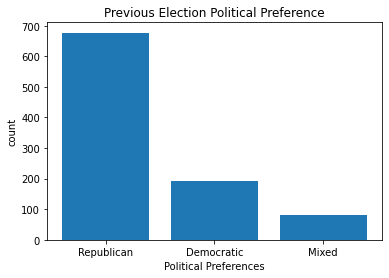

In [95]:
#visualizing previous election preferences
pyplot.bar(political_grp, data_df["dem"].value_counts())

# set x/y labels and plot title
x = plt.pyplot.xlabel("Political Preferences")
y= plt.pyplot.ylabel("count")
title = plt.pyplot.title("Previous Election Political Preference")